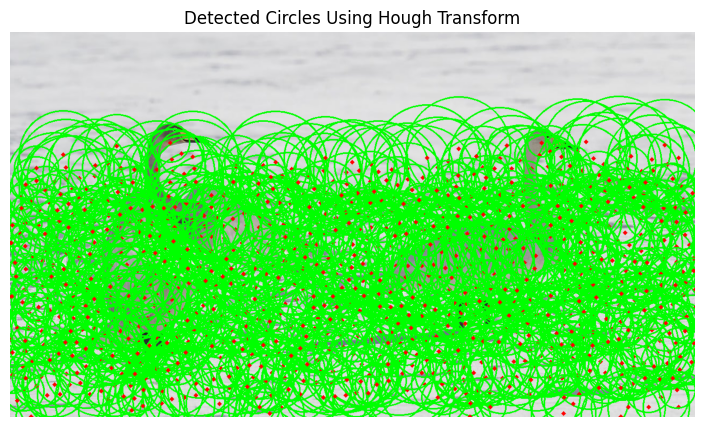

Circles detected and saved as output_circles.jpg


In [1]:
# circle_detection_hough_transform.py

import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_circles(input_path, output_path, min_radius=10, max_radius=100):
    # Read the image
    img = cv2.imread(input_path, cv2.IMREAD_COLOR)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect circles using Hough Transform
    circles = cv2.HoughCircles(
        blurred, 
        cv2.HOUGH_GRADIENT, 
        dp=1.2, 
        minDist=20, 
        param1=50, 
        param2=30, 
        minRadius=min_radius, 
        maxRadius=max_radius
    )

    if circles is not None:
        # Convert coordinates and radius to integers
        circles = np.uint16(np.around(circles))

        # Draw the circles on the original image
        for circle in circles[0, :]:
            center = (circle[0], circle[1])  # center of the circle
            radius = circle[2]  # radius of the circle
            cv2.circle(img, center, radius, (0, 255, 0), 2)  # draw the circle
            cv2.circle(img, center, 2, (0, 0, 255), 3)  # draw the center

        # Save the output image
        cv2.imwrite(output_path, img)

    # Display the result
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Detected Circles Using Hough Transform")
    plt.axis("off")
    plt.show()

# Example usage
if __name__ == "__main__":
    input_path = "input.jpg"  # Input image path
    output_path = "output_circles.jpg"  # Output image path
    detect_circles(input_path, output_path, min_radius=10, max_radius=100)
    print(f"Circles detected and saved as {output_path}")
